In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import time

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#original boston dataset
dfx = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) 

#load target attribute and make MEDV dataset
dfy = pd.DataFrame(boston_dataset.target, columns=["MEDV"]) 

#combine original boston dataset and MEDV dataset
df = pd.concat([dfx, dfy], axis=1) 
df = pd.DataFrame(df)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
## Separating dependent and independent features
x = df.drop('MEDV',axis=1)
y = df['MEDV'].values

In [9]:
## Lets add intercept the intercept term
x.insert(0,'X0',1)
x = x.values

In [10]:
print(x)

[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [11]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [12]:
x.shape

(506, 14)

In [13]:
y.shape

(506,)

In [14]:
## Number of features
n = x.shape[1] 
print(n)

## Number of data-points(i.e rows)
m = len(df.index)
print(m)

14
506


## Non_Vectorized Implementation

In [15]:
theta = np.ones(n)
theta

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Hypothesis Implementation

In [16]:
start = time.time()

hypothesis = []
for i in range(m): ## through all the data-points(rows)
    hypo_i = 0
    for j in range(n): ## through all the features(columns)
        hypo_i = hypo_i + theta[j] + x[i,j]
    hypothesis.append(hypo_i)
    
end = time.time()
print("Time taken : ",str(1000*(end-start)) + "ms")

Time taken :  6.031513214111328ms


In [17]:
print(len(hypothesis)) ## 506 hypothesis for 506 data-points

506


### Cost Implementation

In [18]:
start = time.time()

cost_function = 0
hypothesis    = []

for i in range(m): ## through all the data-points(rows)
    hypo_i = 0
    for j in range(n): ## through all the features(columns)
        hypo_i = hypo_i + theta[j] + x[i,j]
    
    cost_i        = (hypo_i - y[i])**2
    cost_function = cost_function + cost_i

cost_function = (1/(2*m))*cost_function
    
end = time.time()

print("Cost function : ",cost_function)
print("Time taken    : ",str(1000*(end-start)) + "ms")

Cost function :  424424.07863799814
Time taken    :  5.989551544189453ms


### Derivation Implementation

In [19]:
start = time.time()

dev_list = []
for k in range(n):
    dev_sum = 0
    for i in range(m):
        hypo_i = 0
        for j in range(n):
            hypo_i = hypo_i + (theta[j] * x[i,j])  ## hypothesis calculation 
            
        dev_i   = x[i,k] * (hypo_i - y[i])
        dev_sum = dev_sum + dev_i
        
    dev_sum = (1/m)*dev_sum
    
    dev_list.append(dev_sum)
    
end = time.time()
print("Time taken    : ",str(1000*(end-start)) + "ms")

Time taken    :  78.03845405578613ms


In [20]:
print("Derivatives for the 14 features")
print(dev_list)

Derivatives for the 14 features
[889.4287652569171, 4001.0686866586525, 9097.68757986166, 10713.653158919557, 60.924197944664016, 505.791788232947, 5551.979763533145, 63615.71874496635, 3195.4028268958064, 9740.121417075097, 390167.6856683995, 16582.616841974293, 317072.50115784723, 11904.067807263247]


### Gradient Descent Implementation

In [21]:
def cost_loop(theat=theta, x=x, y=y, m=m, n=n):
    cost = 0
    for i in range(m):
        hypo_i = 0
        
        for j in range(n):
            hypo_i = hypo_i + theta[j]*x[i,j]
        
        cost_i = (hypo_i - y[i])**2
        cost   = cost + cost_i
    
    cost = (1/(2*m))*cost
    return cost

In [22]:
start = time.time()

theta = np.ones(n)
learning_rate = 0.0005
cost_list = []

for itr in range(1000):  ## Number of times the below process to execute
    dev_list = []
    
    for k in range(n):
        dev_sum = 0
        for i in range(m):
            hypo_i = 0
            for j in range(n):
                hypo_i = hypo_i + (theta[j] * x[i,j])  ## hypothesis calculation 

            dev_i   = x[i,k] * (hypo_i - y[i])
            dev_sum = dev_sum + dev_i

        dev_sum = (1/m)*dev_sum
        dev_list.append(dev_sum)

    theta    = theta - learning_rate * np.array(dev_list)
    cost_val = cost_loop(theta)
    cost_list.append(cost_val)
    
end = time.time()
print("Time taken    : ",str(1000*(end-start)) + "ms")

<ipython-input-21-2f73a6cf3abf>:10: RuntimeWarning: overflow encountered in double_scalars
  cost   = cost + cost_i
<ipython-input-21-2f73a6cf3abf>:9: RuntimeWarning: overflow encountered in double_scalars
  cost_i = (hypo_i - y[i])**2
<ipython-input-22-9fe1025d6d0a>:18: RuntimeWarning: overflow encountered in double_scalars
  dev_sum = dev_sum + dev_i
<ipython-input-22-9fe1025d6d0a>:17: RuntimeWarning: invalid value encountered in double_scalars
  dev_i   = x[i,k] * (hypo_i - y[i])
<ipython-input-22-9fe1025d6d0a>:23: RuntimeWarning: invalid value encountered in subtract
  theta    = theta - learning_rate * np.array(dev_list)


Time taken    :  55816.181659698486ms


In [23]:
print(cost_val)

nan


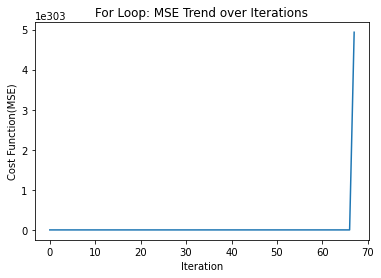

In [24]:
plt.plot(np.arange(0, 1000),cost_list)

plt.xlabel('Iteration')
plt.ylabel('Cost Function(MSE)')
plt.title('For Loop: MSE Trend over Iterations')
plt.show()

# Vectorized Implementation

## Hypothesis Implementation

<img src = 'clips/hypothesis.jpg'>

In [25]:
start = time.time()
hypo = np.dot(x,theta)  # x@theta
end = time.time()

print("Time taken : ",str(1000*(end-start)) + "ms")

Time taken :  0.0ms


In [26]:
print(len(hypo))  ## 506 hypothesis for 506 data-points

506


## Cost Implementation
<img src = 'clips/cost_function.png'>

In [27]:
start = time.time()
cost_function = (1/(2*m))*np.transpose((x@theta - y))@(x@theta - y)
end = time.time()

print("Cost function : ",cost_function)
print("Time taken    : ",str(1000*(end-start)) + "ms")

Cost function :  nan
Time taken    :  1.0004043579101562ms


<img src = 'clips/derivation.jpg'>

In [28]:
start = time.time()
derivative = ((1/m) * np.transpose(x) @ (x@theta -y))
end = time.time()

print("Time taken    : ",str(1000*(end-start)) + "ms")

Time taken    :  0.9946823120117188ms


In [29]:
print("Derivatives for the 14 features")
print(derivative)

Derivatives for the 14 features
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


## Gradient Descent Implementation

In [30]:
def cost(theta, x=x, y=y, m=m):
    cost = np.transpose(x@theta - y) @ (x@theta - y)
    cost = (1/(2*m))*cost
    return cost

In [34]:
start = time.time()
a = 0.0005
theta = np.ones(n)
cost_list = []

for i in range(100):
    theta = theta - (a*(1/m)*np.transpose(x)) @ (x@theta - y)
           
    cost_val = cost(theta)
    cost_list.append(cost_val)
            
end = time.time()
print("Time taken    : ",str(1000*(end-start)) + "ms")

Time taken    :  13.999223709106445ms


<ipython-input-30-d342905f3e7c>:2: RuntimeWarning: overflow encountered in matmul
  cost = np.transpose(x@theta - y) @ (x@theta - y)


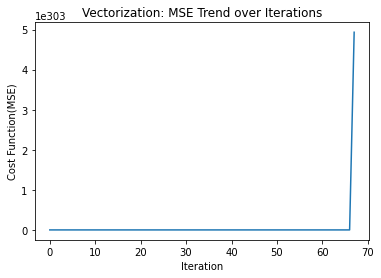

In [36]:
plt.plot(np.arange(0, 100),cost_list)

plt.xlabel('Iteration')
plt.ylabel('Cost Function(MSE)')
plt.title('Vectorization: MSE Trend over Iterations')
plt.show()

In [33]:
'''
References
1) https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d
2) https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
3) https://stackoverflow.com/questions/57862963/problem-loading-medv-column-in-boston-dataset
'''

'\nReferences\n1) https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d\n2) https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155\n3) https://stackoverflow.com/questions/57862963/problem-loading-medv-column-in-boston-dataset\n'